In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/Users/mufseeramusthafa/Documents/machine_learning/airquality_index_predicton/Data/Real-Data/\
Real_Combine.csv")

In [3]:
df.dropna(inplace=True)

In [4]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.20)

In [6]:
from sklearn.neighbors import KNeighborsRegressor
KNeighbors_model=KNeighborsRegressor()

In [7]:
KNeighbors_model.fit(x_train,y_train)

KNeighborsRegressor()

In [11]:
print("coeficient of determination R^2 on training set:{}".format(KNeighbors_model.score(x_train,y_train)))

coeficient of determination R^2 on training set:0.7118802386609703


In [12]:
print("coeficient of determination of R^2 on test set :{}".format(KNeighbors_model.score(x_test,y_test)))

coeficient of determination of R^2 on test set :0.5994369997248352


In [13]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(KNeighbors_model,x,y,cv=5)

In [14]:
score.mean()

0.4315907907186956

###  model evaluation 

In [15]:
prediction=KNeighbors_model.predict(x_test)

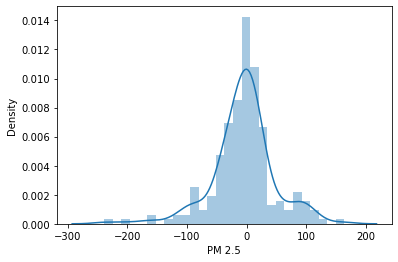

In [16]:
sns.distplot(y_test-prediction)
plt.show()

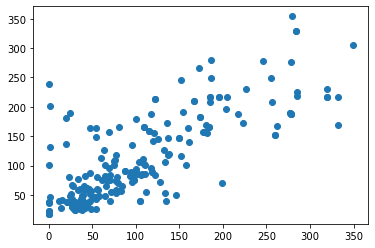

In [19]:
plt.scatter(y_test,prediction)
plt.show()

### hyperparameter tuning

In [21]:
accuracy_rate=[]
for i in range(1,10):
    knn=KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=5,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

In [22]:
accuracy_rate

[-3518.9394899838517,
 -3307.8743084000553,
 -3602.8073631695324,
 -3570.8991823617907,
 -3613.3199366264244,
 -3646.3211099449377,
 -3675.2706960966766,
 -3675.1645936371287,
 -3628.767448933007]

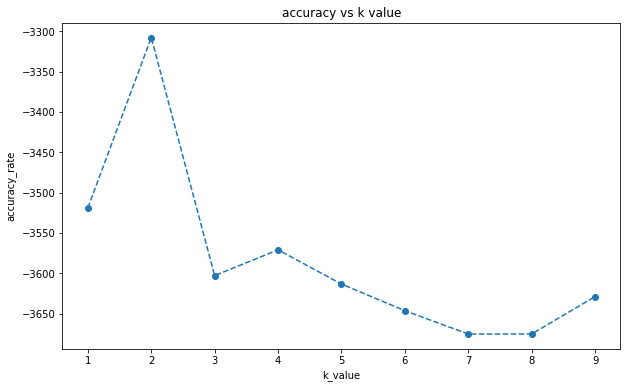

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,10),accuracy_rate,marker="o",linestyle="dashed")
plt.title("accuracy vs k value")
plt.xlabel("k_value")
plt.ylabel("accuracy_rate")
plt.show()

In [35]:
knn=KNeighborsRegressor(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [36]:
prediction=knn.predict(x_test)

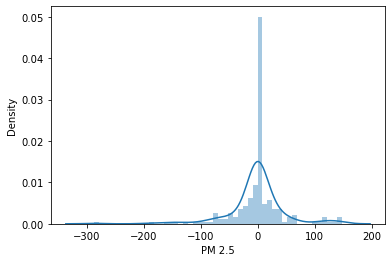

In [37]:
sns.distplot(y_test-prediction)
plt.show()

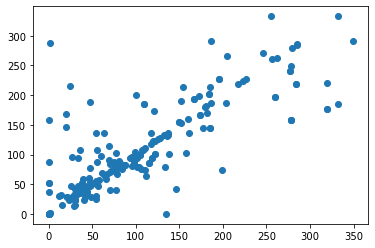

In [39]:
plt.scatter(y_test,prediction)
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
print("MAE :{}".format(mean_absolute_error(y_train,prediction)))
print("MSE :{}".format(mean_squared_error))